In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/codeheroku/Introduction-to-Machine-Learning/master/Face%20Recognition%20Using%20PCA/face_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [34]:
x = df.iloc[:,:4096]
y = df.iloc[:,4096:]

In [47]:
print("Dimension of each image:",np.array(x.iloc[0]).reshape(1,4096).shape)
print("Dimension of dataset",x.shape)

Dimension of each image: (1, 4096)
Dimension of dataset (400, 4096)


In [40]:
print(y.target.unique())
print("No of classes in dataset:",len(y.target.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
No of classes in dataset: 40


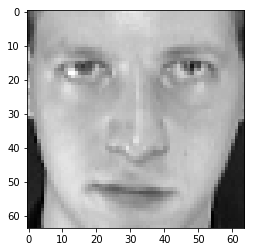

In [49]:
#Sample image
plt.imshow(np.array(x.iloc[2]).reshape(64, 64), cmap='gray')

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 23)

In [96]:
x_train.T.shape

(4096, 300)

In [102]:
avg_face = []

for index,col in x_train.T.iterrows():
    avg_face.append(np.mean(col))

In [104]:
avg_face = np.array(avg_face)

In [111]:
avg_face = avg_face.reshape(1,4096)

In [114]:
avg_face.shape

(1, 4096)

In [120]:
subtracted_images = []

for index,row in x_train.iterrows():
    current = np.array(row).reshape(1,4096) - avg_face
    subtracted_images.append(current)
    print(current)

[[ 0.01728651  0.03548208 -0.01903582 ...  0.16578514  0.16483471
   0.16706611]]
[[-0.10254821 -0.1339394   0.0718733  ... -0.10280991 -0.07483471
  -0.09326446]]
[[-0.15626723 -0.20831956 -0.200854   ... -0.14413222 -0.14508264
  -0.13871901]]
[[-0.05709365 -0.00584022  0.0760055  ... -0.16892561 -0.10789256
  -0.10979339]]
[[ 0.24042697  0.19250688  0.22476586 ... -0.23090909 -0.24012396
  -0.23789256]]
[[0.09166667 0.07267218 0.0512121  ... 0.31867769 0.31359504 0.28276859]]
[[ 0.00902203  0.04374655  0.0512121  ... -0.16479338 -0.14095041
  -0.14698346]]
[[ 0.04621214  0.08920108  0.1669146  ... -0.21438016 -0.16987603
  -0.14698346]]
[[ 0.24455927  0.22556478  0.1958402  ... -0.18132231 -0.1657438
  -0.14698346]]
[[ 0.09166667  0.09333335  0.1297245  ... -0.14826446 -0.16987603
  -0.12632232]]
[[0.19497243 0.14705233 0.0636088  ... 0.20297519 0.1772314  0.1794628 ]]
[[ 0.35199723  0.32887052  0.28261706 ... -0.02842974 -0.02111569
  -0.01888429]]
[[ 0.29414603  0.30407713  0.2950

In [124]:
x_train = np.array(subtracted_images)

In [127]:
x_train = x_train.reshape(300,4096)

In [128]:
x_train.shape

(300, 4096)